# Project Description 
You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?

your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.

# Project's Goal
Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

# Table of Contents

 * [Data load, overview & preperation](#chapter1)


 * [Exploratory Data Analysis](#chapter2)
 
    * [Proportions of the various types of establishments](#section_2_1)
    * [Proportions of chain and nonchain establishments](#section_2_2)
    * [Which type of establishment is typically a chain?](#section_2_3)
    * [What characterizes chains](#section_2_4)
    * [The average number of seats for each type of establishment](#section_2_5)
    * [street name column from the address column](#section_2_6)
    * [Top ten streets by number of establishments](#section_2_7)
    * [Number of streets that only have one establishment](#section_2_8)
    * [Distribution of the number of seats for streets with a lot of establishments](#section_2_9)
    * [Establishments distribution in our top street](#section_2_10)
    
    
  * [Overall conclusion & Recommendations](#chapter3)
  
  * [Presentation](#chapter4)   

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Load, overview & prepare the data</h2>
</div>
<a class="anchor" id="chapter1"></a>

### Chapter 1 <a class="anchor" id="chapter1"></a>


Import libraries

In [1]:
pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 950 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn==0.11.0

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 283 kB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib==3.4.0

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.3 MB 917 kB/s eta 0:00:01     |███████████████████████████████▏| 10.0 MB 917 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import warnings
import math as mth
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go 
import matplotlib.dates as mdates
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter
import scipy.stats as stats
import re

In [5]:
#ignorning warnings
warnings.simplefilter('ignore')

In [6]:
pd.set_option('max_colwidth', 400)

make a try-except block in order to avoid file path error when working both locally and remotely:

In [7]:
try:
    df = pd.read_csv('rest_data_us.csv')
except:
    df = pd.read_csv('/datasets/rest_data_us.csv')

Check the tables first 5 rows to see the general information.

In [8]:
df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Check the table's general structure

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


percentage of missing data in columns

In [10]:
df.isna().mean() * 100

id             0.000000
object_name    0.000000
address        0.000000
chain          0.031085
object_type    0.000000
number         0.000000
dtype: float64

watching the rows with missing chain value:

In [11]:
df_missing = df[df.isna().any(axis=1)]
df_missing

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


Checking if their name appears again in the data (a chain) or not (not a chain)

In [12]:
names = df_missing['object_name'].to_list()
df.query('object_name in @names')

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


#### Conclusion:
We have 3 rows (0.03%) with missing chain that appear only once in our data.

We assumed that by their single appearance we conclude their value for chain column should be False as they are not a chain,
But there are many chains in the dataset with one appearance and so we will drop our 3 missing rows.

dropping missing chain:

In [13]:
df.chain = df.chain.dropna()

checking for duplicates

In [14]:
df.duplicated().sum()

0

Checking for the table's initial statistics

In [15]:
df.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [16]:
df.describe(include='object')

,object_name,address,chain,object_type
count,9651,9651,9648,9651
unique,8672,8517,2,6
top,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant
freq,47,11,5972,7255


### Conclusion:
- We have no duplicated rows in our data.
- We had 3 rows with missing values for chain column, who were dropped.
- Several columns data-types should be changed - object_type to category and chain can be changed to bool. 
- By our .describe method we see that our largest chain establishment is THE COFFEE BEAN & TEA LEAF, with 47 appearences.

changing columns data types:

In [17]:
df['object_type'] = df['object_type'].astype('category')
df['chain'] = df['chain'].astype('bool')

<a class="anchor" id="chapter2"></a>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Exploratory Data Analysis</h2>
</div>

<a class="anchor" id="section_2_1"></a>

### Proportions of the various types of establishments

#### Proportions of the various types of establishments in % and in absolute values

Proportions of the various types of establishments in %

In [18]:
types = df.object_type.value_counts()
types_perc = round((df.object_type.value_counts(normalize=True) * 100),2)
types_perc

Restaurant    75.17
Fast Food     11.05
Cafe           4.51
Pizza          3.32
Bar            3.03
Bakery         2.93
Name: object_type, dtype: float64

Plotting the Proportions of the various types of establishments in %

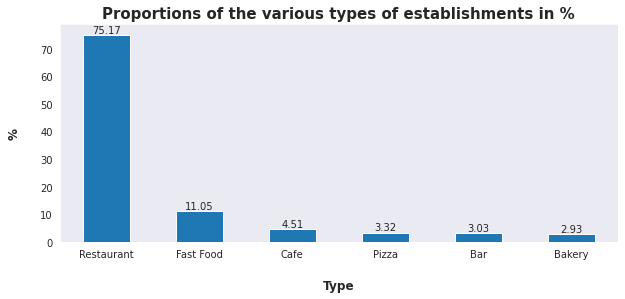

In [19]:
sns.set_style('dark') 
ax = types_perc.plot.bar(figsize=(10,4))
ax.set_title("Proportions of the various types of establishments in %",weight='bold',size=15)
ax.set_xlabel("Type", labelpad=20, weight='bold', size=12)
ax.set_ylabel("%", labelpad=20, weight='bold', size=12)
ax.tick_params(axis='x', rotation=0)
ax.bar_label(ax.containers[0]);

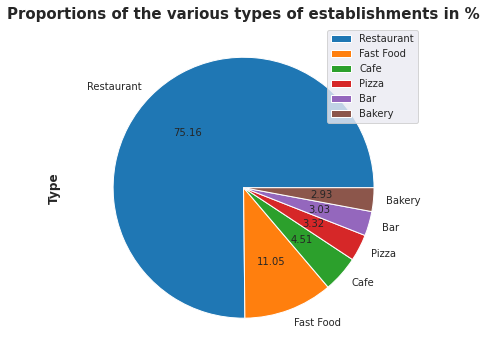

In [20]:
ax = types_perc.plot.pie(figsize=(6, 6),autopct='%.2f')
ax.set_title("Proportions of the various types of establishments in %",weight='bold',size=15)
ax.set_ylabel("Type", labelpad=20, weight='bold', size=12)
ax.legend(loc='upper right',bbox_to_anchor=(1.05, 1));

##### Description:
This graphs shows the Proportions of the various types of establishments in %.

We see our most popular type by a margin is restaurant, with  75%, followed by fast food with 11%.

Cafe, pizza, bar and bakery types have a close share of around 3%.

plotting Proportions of the various types of establishments in absolute values:

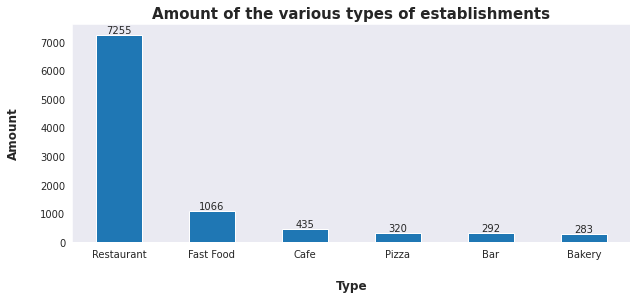

In [21]:
sns.set_style('dark') 
ax = types.plot.bar(figsize=(10,4))
ax.set_title("Amount of the various types of establishments",weight='bold',size=15)
ax.set_xlabel("Type", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Amount", labelpad=20, weight='bold', size=12)
ax.tick_params(axis='x', rotation=0)
ax.bar_label(ax.containers[0]);

##### Description & Conclusion:
This graphs shows the Proportions of the various types of establishments in absolute values.

We see the same results from our previous graph, just in absolute values.

We see our most popular type by a margin is restaurant, with 7255  followed by fast food with 1066.

Cafe, pizza, bar and bakery types have a close amount of around 300.

<a class="anchor" id="section_2_2"></a>

### proportions of chain and nonchain establishments

In [22]:
chain_types = df.chain.value_counts()
chain_perc = round((df.chain.value_counts(normalize=True) * 100),2)

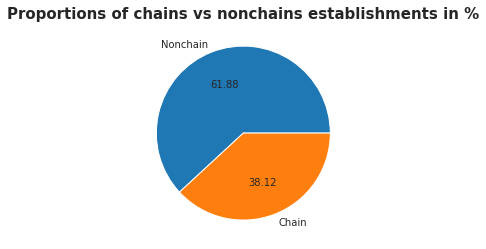

In [23]:
sns.set_style('dark') 
mylabels = ['Nonchain','Chain']
ax = chain_types.plot.pie(autopct='%.2f',labels = mylabels, figsize=(10,4))
ax.set_title("Proportions of chains vs nonchains establishments in %",weight='bold',size=15)
plt.ylabel('');

##### Description:
This graph shows the proportions of chain and nonchain total establishments in %.

- The majority of our establishments are a nonchain, with 61.88% percent of the establishments.
- The amount of chained establishments is 38.12%.

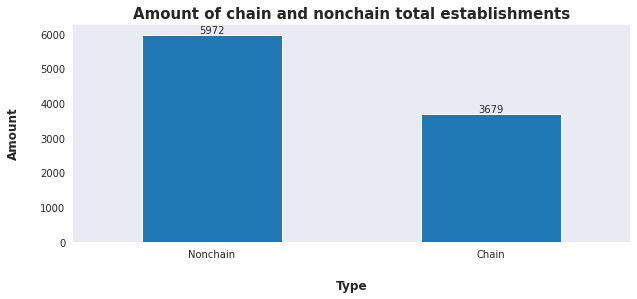

In [24]:
sns.set_style('dark') 
ax = chain_types.plot.bar(figsize=(10,4))
ax.set_title("Amount of chain and nonchain total establishments",weight='bold',size=15)
ax.set_xlabel("Type", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Amount", labelpad=20, weight='bold', size=12)
ax.tick_params(axis='x', rotation=0)
ax.set_xticklabels(['Nonchain','Chain'])
ax.bar_label(ax.containers[0]);

##### Description:
This graph shows the proportions of chain and nonchain total establishments in absolute values.
- The majority of our establishments are a nonchain, with 5972 establishments.
- The amount of chained establishments is 3679.

unique establishments dataframe to measure the proportion of unique establishments

In [25]:
df2 = df.groupby('object_name')['chain'].agg([('chain','max')]).reset_index()

In [26]:
unique = df2.chain.value_counts()
unique_perc = round(df2.chain.value_counts(normalize=True) * 100,2)

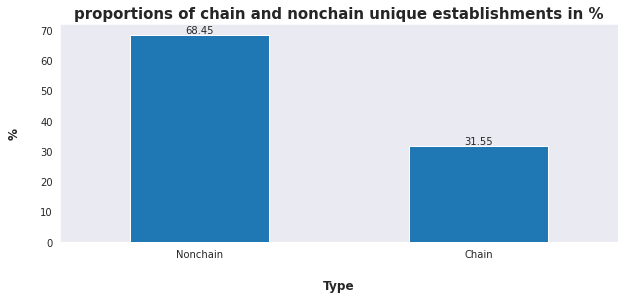

In [27]:
sns.set_style('dark') 
ax = unique_perc.plot.bar(figsize=(10,4))
ax.set_title("proportions of chain and nonchain unique establishments in %",weight='bold',size=15)
ax.set_xlabel("Type", labelpad=20, weight='bold', size=12)
ax.set_ylabel("%", labelpad=20, weight='bold', size=12)
ax.tick_params(axis='x', rotation=0)
ax.set_xticklabels(['Nonchain','Chain'])
ax.bar_label(ax.containers[0]);

##### Description:
This graph shows the proportions of chain and nonchain unique establishments(unique object_names) in %.

- The majority of our establishments are a nonchain, with 68.45% percent of the establishments.
- The amount of chained establishments is 31.55%.

plotting the proprtions in absolute values:

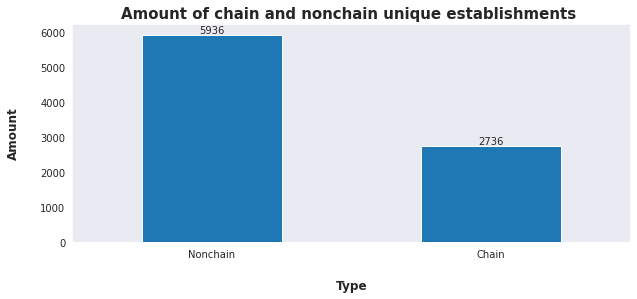

In [28]:
sns.set_style('dark') 
ax = unique.plot.bar(figsize=(10,4))
ax.set_title("Amount of chain and nonchain unique establishments ",weight='bold',size=15)
ax.set_xlabel("Type", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Amount", labelpad=20, weight='bold', size=12)
ax.tick_params(axis='x', rotation=0)
ax.set_xticklabels(['Nonchain','Chain'])
ax.bar_label(ax.containers[0]);

##### Description:
This graph shows the proportions of chain and nonchain unique establishments(unique object_names) in absolute values.

- The majority of our establishments are a nonchain, with 5936 establishments.
- The amount of chained establishments is 2736.

<a class="anchor" id="section_2_3"></a>

### Which type of establishment is typically a chain?

dfs of establishments with True value in chain column (is a chain), and False (nonchain)

In [29]:
chain = df.query('chain == True')
nonchain = df.query('chain == False')

printing the types of establishments and the amount of nonchains

In [30]:
type_nonchain = nonchain.groupby('object_type').agg({'chain': 'count'}).sort_values(by='chain',ascending=False)
type_nonchain.columns = ['nonchain']
type_nonchain

,nonchain
object_type,
Restaurant,4961
Fast Food,461
Bar,215
Cafe,169
Pizza,166
Bakery,0


printing the types of establishments and the amount of chains

In [31]:
type_chain = chain.groupby('object_type').agg({'chain': 'count'}).sort_values(by='chain',ascending=False)
type_chain

,chain
object_type,
Restaurant,2294
Fast Food,605
Bakery,283
Cafe,266
Pizza,154
Bar,77


merging the dfs:

In [32]:
both = type_chain.merge(type_nonchain,on='object_type')

calculating and printing chain % column to find out which type is typically a chain

In [33]:
both['chain_perc'] = round((both.chain / (both.chain + both.nonchain)) * 100,2)
both = both.sort_values(by='chain_perc',ascending=False)
both

,chain,nonchain,chain_perc
object_type,,,
Bakery,283,0,100.00
Cafe,266,169,61.15
Fast Food,605,461,56.75
Pizza,154,166,48.12
Restaurant,2294,4961,31.62
Bar,77,215,26.37


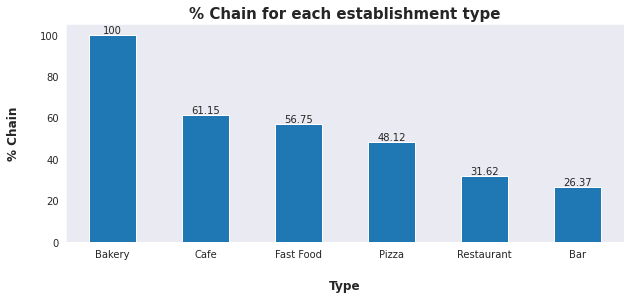

In [34]:
sns.set_style('dark') 
ax = both.chain_perc.plot.bar(figsize=(10,4))
ax.set_title("% Chain for each establishment type",weight='bold',size=15)
ax.set_xlabel("Type", labelpad=20, weight='bold', size=12)
ax.set_ylabel("% Chain", labelpad=20, weight='bold', size=12)
ax.tick_params(axis='x', rotation=0)
ax.bar_label(ax.containers[0]);

##### Description:
This graph shows Chain % for each establishment type
- Bakery is the leading type by a margin with 100% of its establishments being a chain.
- Bar has the least chains with 26% of its total establishments .
- The type of establishment that is always a chain is Bakery.
- The types that are typically(>50%) a chain are Cafe(61.15%) and fast food(56.75%)

<a class="anchor" id="section_2_4"></a>

### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

categorizing the amount of establishments for every chain to see what characterizes chains in terms of amount of establishments:

In [35]:
a = chain.object_name.value_counts().to_frame().reset_index()
a.columns = ['object_name','estb_count']
a['category'] = pd.cut(a['estb_count'], bins=[1,1.9,5,10,20,47], include_lowest=True,
                       labels=['1', '2-5', '6-10', '11-20','21-47'])

merging to get the seats number column

In [36]:
b = pd.merge(a,chain[['object_name','number']],on='object_name', how='left')

viewing a sample of our new dataframe:

In [37]:
b.sample(5)

,object_name,estb_count,category,number
1288,NISSI BAKERY,2,2-5,28
1532,TACOS Y GUISADOS EL CHARRO,1,1,14
2379,LA FIESTA BAKERY,1,1,1
1292,CAMPOS TACOS,2,2-5,18
925,ORLEANS AND YORK DELI,2,2-5,27


checking the amount of chains in each category (categories of amount of establishments)

In [38]:
b.category.value_counts()

1        2243
2-5      1080
6-10      150
11-20     128
21-47      78
Name: category, dtype: int64

plotting the amount of seats per chain, categorized by number of establishments per chain

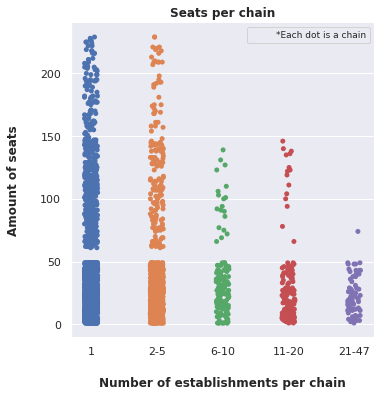

In [39]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.catplot(x="category",y="number", data=b)
plt.title('Seats per chain', y=1, fontsize = 16, weight='bold', size=12)
plt.plot([], [], ' ', label="*Each dot is a chain")
plt.legend(loc=1, prop={'size': 9})
axes = ax.axes.flatten()
axes[0].set_ylabel("Amount of seats",labelpad=20, weight='bold', size=12)
axes[0].set_xlabel("Number of establishments per chain",labelpad=20, weight='bold', size=12);

##### Description & Conclusion:
This graph shows the amount of seats per chain, and the amount of chains in the number of establishments categories.

We can clearly see that what characterizes chains is having few establishments with a lot of seats. 

<a class="anchor" id="section_2_5"></a>

### Find The average number of seats for each type of establishment. On average, which type of establishment has the greatest number of seats?

In [40]:
avg_seat = df.groupby('object_type').agg({'number':'mean'}).reset_index()
avg_seat.columns = ['object_type','avg_seats']
avg_seat.avg_seats = avg_seat.avg_seats.round(2)

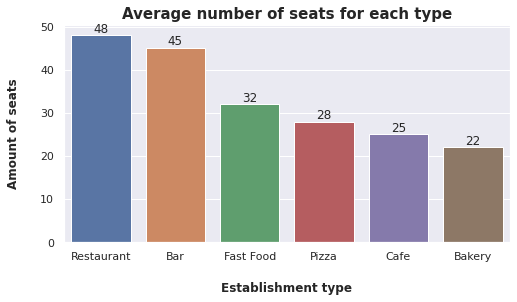

In [41]:
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.barplot(x="object_type",y="avg_seats",data=round(avg_seat),order=avg_seat.sort_values('avg_seats',ascending=False).object_type)
ax.bar_label(ax.containers[0])
ax.set_title("Average number of seats for each type",weight='bold',size=15)
ax.set_xlabel("Establishment type", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Amount of seats", labelpad=20, weight='bold', size=12);

##### Description & Conclusion:
This graph shows the average number of seats for each establishment type.
- On average, the type of establishment that has the greatest number of seats is Restaurant
- On average , the type of establishment that has the lowest number of seats is Bakery.

<a class="anchor" id="section_2_6"></a>

### Create a street name column from the address column

street name parsing:

In [42]:
def street_generator(x):
    street_list=[]
    street_list= re.findall('[0-9]*[a-zA-Z]{2,}',x)
    return ' '.join(street_list)

In [43]:
df['street'] = df.address.apply(street_generator)

head of our df to see the newly created street name column:

In [44]:
df.head()

,id,object_name,address,chain,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


<a class="anchor" id="section_2_7"></a>

### Top ten streets by number of establishments

plotting top ten streets by number of establishments

In [45]:
 top10 = df.street.value_counts().head(10)

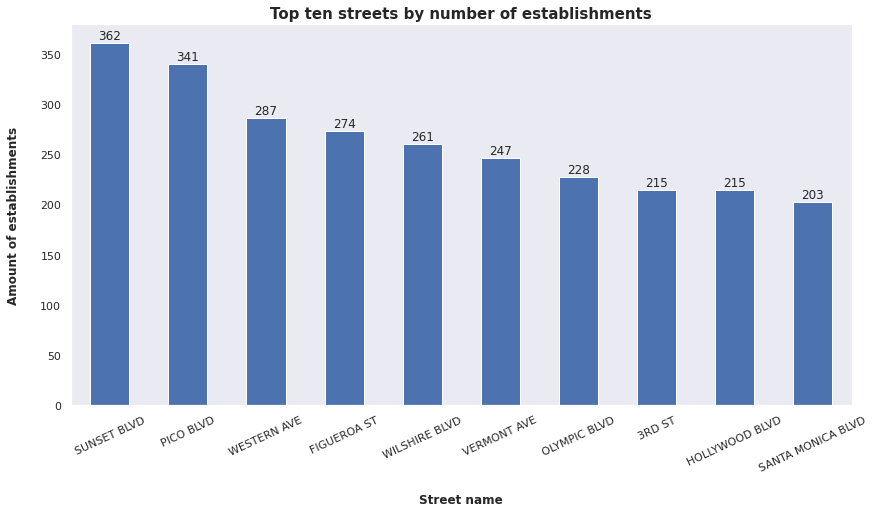

In [46]:
sns.set_style('dark') 
ax = top10.plot.bar(figsize=(14,7))
ax.set_title("Top ten streets by number of establishments",weight='bold',size=15)
ax.set_xlabel("Street name", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Amount of establishments", labelpad=20, weight='bold', size=12)
ax.tick_params(axis='x', rotation=25)
ax.bar_label(ax.containers[0]);

##### Description & Conclusion:
This graph shows the top ten streets by number of establishments.

- The street with most establishments is sunset blvd, with 362 establishments, followed by pico blvd with 341.

<a class="anchor" id="section_2_8"></a>

###  Find the number of streets that only have one establishment.

In [47]:
streets = df.street.value_counts().to_frame().reset_index()
streets.columns = ['street_name','estb_count']

Amount of streets with one establishment:

In [59]:
len(streets.query('estb_count == 1'))

408

##### Conclusion:
There are 408 streets with one establishment.

<a class="anchor" id="section_2_9"></a>

### Distribution of the number of seats for streets with a lot of establishments

defining streets with alot of establishments to be our top 5 streets.

changing column name street_name to street for merging 

In [49]:
streets.columns = ['street','estb_count']

merging to get the number of seats column into our streets df.

In [50]:
streets_seats = pd.merge(streets,df[['street','number']],on='street', how='left')

our top 5 streets names:

In [51]:
top5names = streets_seats.street.value_counts().head(5).keys().to_list()
streets_seats.street.value_counts().head(5).keys().to_list()

['SUNSET BLVD', 'PICO BLVD', 'WESTERN AVE', 'FIGUEROA ST', 'WILSHIRE BLVD']

In [52]:
top5 = streets_seats.query('street in @top5names')

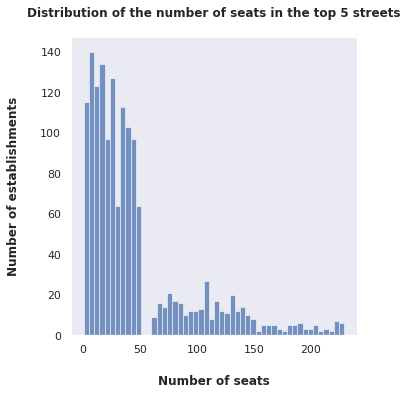

In [53]:
ax = sns.displot(top5, x="number", bins = 50)
sns.set(rc={'figure.figsize':(20,15)})
plt.title('Distribution of the number of seats in the top 5 streets', y=1.05, fontsize = 16, weight='bold', size=12)
axes = ax.axes.flatten()
axes[0].set_ylabel("Number of establishments",labelpad=20, weight='bold', size=12)
axes[0].set_xlabel("Number of seats",labelpad=20, weight='bold', size=12);

##### Description & Conclusion:
This graph shows the Distribution of the number of seats in the top 5 streets.

We can see the trend is having up to 50 seats, as the vast majority of our establishments are distributed among this amount of seats.

- the general trend in the top 5 streets is to have low (0-50) amount of seats.

- There are relativley low amount of establishments with more than 50 seats.

<a class="anchor" id="section_2_9"></a>

### establishments distribution in our top street:

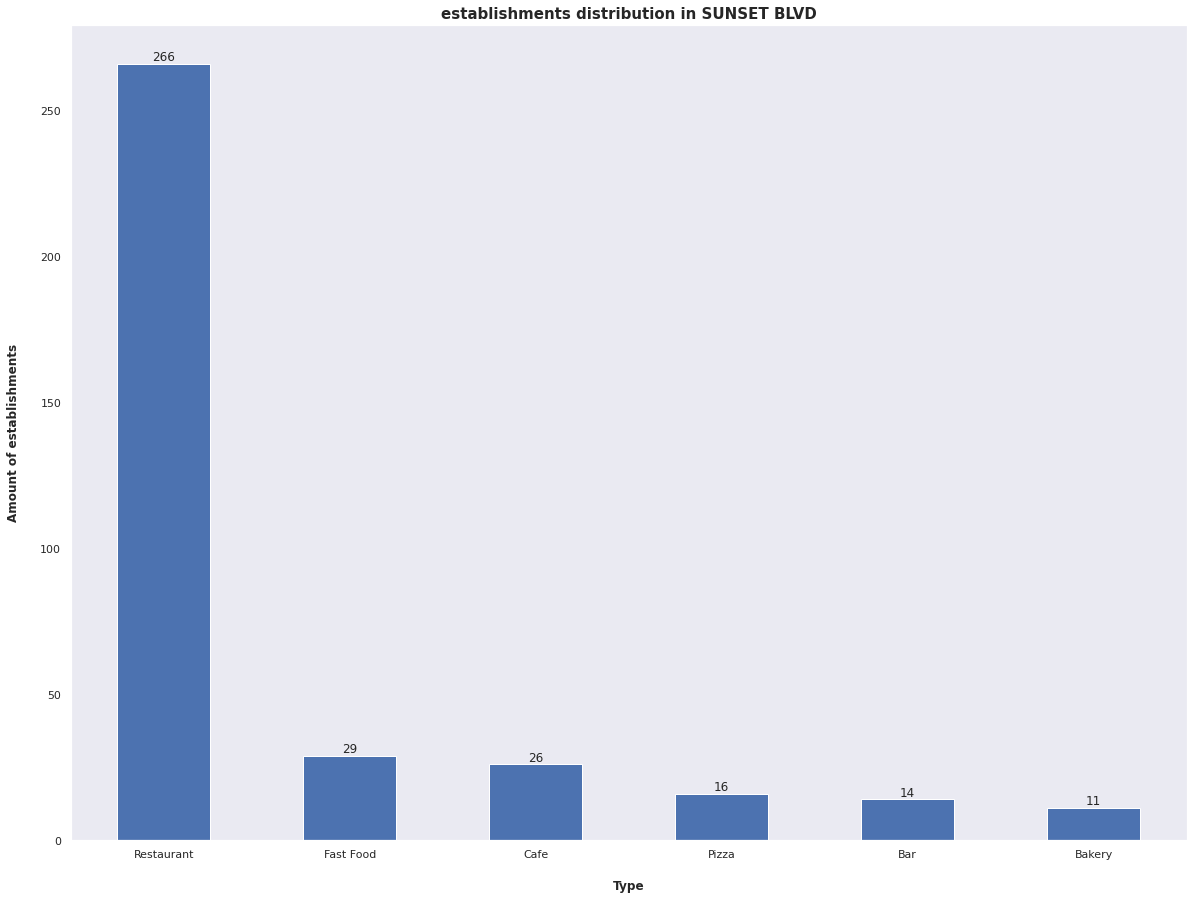

In [54]:
sns.set_style('dark') 
ax = df.query('street == "SUNSET BLVD"').object_type.value_counts().plot(kind='bar')
ax.set_title("establishments distribution in SUNSET BLVD",weight='bold',size=15)
ax.set_xlabel("Type", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Amount of establishments", labelpad=20, weight='bold', size=12)
ax.tick_params(axis='x', rotation=0)
ax.bar_label(ax.containers[0]);

##### Conclusion:
We see there are a lot of restaurants, and a much lower amount of the rest of the kinds - something to consider when deciding what type of establishment should we open if we want to be located there.

<a class="anchor" id="chapter3"></a>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Overall conclusion & Recommendations</h2>
</div>

To summarize, we concluded many conclusions regarding different aspects of the data:

In the data's preparation & processing stage:
- 3 rows with missing values for chain column, who were dropped.

In the Metrics calculations stage:

- our most popular establishment type is restaurant, being 75% out of all establishments.

- The majority of our establishments are a nonchain, with 61.88% percent of the establishments.

- All Bakeries are being a chain.

- Bar has the least chains with 26% of its total establishments.

- Most chains have few establishments with a lot of seats.

- On average, the type of establishment that has the greatest number of seats is Restaurant.

- On average , the type of establishment that has the lowest number of seats is Bakery.

- The street with most establishments is sunset blvd, with 362 establishments, followed by pico blvd with 341.

- There are 408 streets with one establishment.

- The top 5 streets with most establishments are: SUNSET BLVD, PICO BLVD, WESTERN AVE, FIGUEROA ST, WILSHIRE BLVD.

- the general trend in the top 5 streets is to have low (0-50) amount of seats.

Recommendations:

- Our establishment's location should be in the top street in amount of establishments - SUNSET BLVD.
  We consider the very high traffic in this street as a crucial advantage, as this will provide us much more chances to attract   new customers.

- We should open a Bakery, since there aren't many bakeries in SUNSET BLVD, which reduces our competition and increases our chances to segregate our place and be unique.
- We should have 

- Our seats number should be following the trend in the street(not having more than 50 seats) and we will choose 30 seats.

- Since all bakeries are chains, we should segregate our selves and not start as a chain, as this will be unique and can help attracting customers. we could develop a chain, but we should start as a nonchain and determine if we continue as a chain afterwards.

<a class="anchor" id="chapter4"></a>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Presentation</h2>
</div>


Link to Presentation:  https://drive.google.com/file/d/1Ioi9_3z7AZ4Mim5N7Hd2rpo-tH_zQpqs/view?usp=sharing